In [1]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project( project_id='a01ec7ba-b7e7-4476-a467-346725c09fa4', project_access_token='p-3e57a5c36d3130eb324d6e30393565fde29c2de5')
pc = project.project_context


This is the first notebook of the Capstone Project Course! It is just one of many.

In [2]:
import numpy as np
import pandas as pd
import sklearn
import datetime

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (12,8)

# these are useful plotting functions.
def histogram(df, col_name):
    # look at loan_duration.
    plt.hist(df[col_name], alpha=0.5, label=col_name)
    plt.legend(loc='upper right')
    plt.show()

def barchart(df, col_name):
    df[col_name].value_counts().plot(kind='bar', subplots=False)

def boxplot(df, col_names, by=None):
    #fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8), sharey=True)
    df.boxplot(column=col_names, return_type='axes', by=by)

def histogram_by_level(df, varName, targetName):
    lvls = df[varName].value_counts()
    for i in lvls.index:
        plt.hist(df[df[varName] == i][targetName], alpha=0.5, label=i, bins=300)

    plt.legend(loc='upper right')
    plt.show()



In [3]:
print(" Hello Capstone Project Course!")
# url = project.get_file_url("completedloan.csv")
df = pd.read_csv(project.get_file("completedloan.csv"))

 Hello Capstone Project Course!


In [4]:
df.columns

Index(['loan_id', 'account_id', 'amount', 'duration', 'payments', 'status',
       'year', 'month', 'day', 'fulldate', 'location', 'purpose'],
      dtype='object')

In [5]:
df.head()

,loan_id,account_id,amount,duration,payments,status,year,month,day,fulldate,location,purpose
0,L00005657,A00003354,4980,12,415,A,2014,7,5,2014-07-05,59,car
1,L00006234,A00006061,5148,12,429,C,2018,5,28,2018-05-28,1,car
2,L00006699,A00008330,7656,24,319,A,2014,3,30,2014-03-30,1,car
3,L00006688,A00008268,8616,24,359,C,2017,9,26,2017-09-26,1,car
4,L00006312,A00006453,10944,36,304,C,2018,5,17,2018-05-17,1,car


In [6]:
print(set(df.purpose))

{'home', 'debt_consolidation', 'home_improvement', 'car'}


In [7]:
print(set(df.location))

{64, 1, 70, 46, 18, 25, 59, 29}


In [8]:
print(set(df.status))

{'B', 'C', 'A', 'D'}


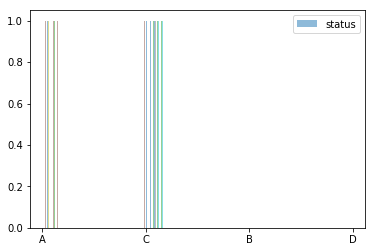

In [9]:
# def histogram(df, col_name, bins):
    # look at loan_duration.

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
histogram(df, 'status')

In [10]:
ls = pd.read_csv(project.get_file("LoanStats2017H1.csv"))
# df = pd.read_csv(project.get_file("completedloan.csv"))
ls.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0,112) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_il_6m,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
0,NaN,NaN,3600.0,3600.0,3600.0,36 months,7.49%,111.97,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,15000.0,15000.0,15000.0,60 months,14.99%,356.78,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,8400.0,8400.0,8400.0,36 months,11.39%,276.56,B,B3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000.0,4000.0,4000.0,36 months,10.49%,130.00,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,6000.0,6000.0,6000.0,36 months,7.24%,185.93,A,A3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
print(set(ls.columns))
print(ls.dtypes)
print(ls.describe())

{'mths_since_recent_bc', 'funded_amnt_inv', 'next_pymnt_d', 'open_il_24m', 'inq_last_12m', 'mo_sin_rcnt_tl', 'mo_sin_rcnt_rev_tl_op', 'bc_util', 'total_acc', 'il_util', 'mo_sin_old_rev_tl_op', 'last_credit_pull_d', 'tot_hi_cred_lim', 'acc_now_delinq', 'avg_cur_bal', 'sec_app_open_acc', 'sec_app_mths_since_last_major_derog', 'open_acc_6m', 'total_pymnt_inv', 'collections_12_mths_ex_med', 'sec_app_mort_acc', 'earliest_cr_line', 'delinq_amnt', 'chargeoff_within_12_mths', 'zip_code', 'percent_bc_gt_75', 'pub_rec', 'revol_bal_joint', 'total_pymnt', 'addr_state', 'revol_bal', 'recoveries', 'application_type', 'verification_status_joint', 'emp_length', 'num_tl_120dpd_2m', 'sec_app_revol_util', 'dti_joint', 'delinq_2yrs', 'sec_app_inq_last_6mths', 'sec_app_chargeoff_within_12_mths', 'max_bal_bc', 'desc', 'num_actv_bc_tl', 'open_rv_12m', 'loan_status', 'num_rev_accts', 'collection_recovery_fee', 'total_bc_limit', 'acc_open_past_24mths', 'sec_app_num_rev_accts', 'grade', 'sec_app_collections_12_

In [12]:
set(ls.loan_status)

{'Current',
 'Fully Paid',
 'In Grace Period',
 'Issued',
 'Late (16-30 days)',
 'Late (31-120 days)',
 nan}

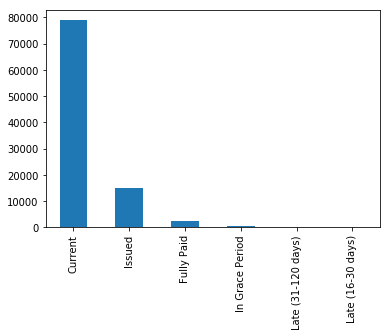

In [13]:
barchart(ls, 'loan_status')


In [14]:
lss = ls.iloc[:5,109:]
lss

,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_il_6m,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
0,9000.0,55699.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,60300.0,30224.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,36100.0,36876.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2500.0,139652.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23200.0,49665.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
lsc = ls[['loan_amnt','term','int_rate','installment','grade','emp_length','home_ownership','annual_inc','issue_d','loan_status','application_type']]


In [16]:

lsc.dropna(inplace= True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [17]:
##  Drop Months from term column
lsc[['term','dd']] = lsc.term.str.split(expand=True)
lsc.drop(columns=['dd'], inplace= True)
# lsc[['term','dd']] = lsc.term.apply(lambda x: pd.Series(str(x).split(" ").str[0])) 
# lsc[['term']]= lsc.term.str.split(' ').str[0]
# lsc.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [18]:
lscs = lsc
# lscs.head()

In [19]:
## Convert int_rate to integer.
lscs['int_rate'] = lscs['int_rate'].str.rstrip('%').astype('float')
lscs.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,application_type
0,3600.0,36,7.49,111.97,A,10+ years,MORTGAGE,120000.0,Mar-17,Issued,INDIVIDUAL
1,15000.0,60,14.99,356.78,C,10+ years,MORTGAGE,125000.0,Mar-17,Issued,INDIVIDUAL
2,8400.0,36,11.39,276.56,B,8 years,MORTGAGE,50000.0,Mar-17,Issued,INDIVIDUAL
3,4000.0,36,10.49,130.00,B,2 years,RENT,50000.0,Mar-17,Issued,INDIVIDUAL
4,6000.0,36,7.24,185.93,A,3 years,RENT,125000.0,Mar-17,Current,INDIVIDUAL


In [20]:
lscs.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,application_type
0,3600.0,36,7.49,111.97,A,10+ years,MORTGAGE,120000.0,Mar-17,Issued,INDIVIDUAL
1,15000.0,60,14.99,356.78,C,10+ years,MORTGAGE,125000.0,Mar-17,Issued,INDIVIDUAL
2,8400.0,36,11.39,276.56,B,8 years,MORTGAGE,50000.0,Mar-17,Issued,INDIVIDUAL
3,4000.0,36,10.49,130.00,B,2 years,RENT,50000.0,Mar-17,Issued,INDIVIDUAL
4,6000.0,36,7.24,185.93,A,3 years,RENT,125000.0,Mar-17,Current,INDIVIDUAL


In [21]:
## convert emp_length and grade to numerical values
mapping_dict = {"emp_length": {"10+ years": 10,"9 years": 9,"8 years": 8,"7 years": 7,"6 years": 6,"5 years": 5,"4 years": 4,"3 years": 3,"2 years": 2,"1 year": 1,"< 1 year": 0,"n/a": 0},
                "grade":{"A": 1,"B": 2,"C": 3,"D": 4,"E": 5,"F": 6,"G": 7}
               }
lscs = lscs.replace(mapping_dict)
lscs[['emp_length','grade']].head()

,emp_length,grade
0,10,1
1,10,3
2,8,2
3,2,2
4,3,1


In [22]:
lscs.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,application_type
0,3600.0,36,7.49,111.97,1,10,MORTGAGE,120000.0,Mar-17,Issued,INDIVIDUAL
1,15000.0,60,14.99,356.78,3,10,MORTGAGE,125000.0,Mar-17,Issued,INDIVIDUAL
2,8400.0,36,11.39,276.56,2,8,MORTGAGE,50000.0,Mar-17,Issued,INDIVIDUAL
3,4000.0,36,10.49,130.00,2,2,RENT,50000.0,Mar-17,Issued,INDIVIDUAL
4,6000.0,36,7.24,185.93,1,3,RENT,125000.0,Mar-17,Current,INDIVIDUAL


In [23]:
# lscs.describe()
lscs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89987 entries, 0 to 96778
Data columns (total 11 columns):
loan_amnt           89987 non-null float64
term                89987 non-null object
int_rate            89987 non-null float64
installment         89987 non-null float64
grade               89987 non-null int64
emp_length          89987 non-null object
home_ownership      89987 non-null object
annual_inc          89987 non-null float64
issue_d             89987 non-null object
loan_status         89987 non-null object
application_type    89987 non-null object
dtypes: float64(4), int64(1), object(6)
memory usage: 8.2+ MB


In [24]:
# lscf = lsc[['loan_amnt','term','installment','grade', 'annual_inc']]
mycolumns = lscs.loc[:,lscs.apply(pd.Series.nunique) != 1]
for col in mycolumns:
    if (len(lscs[col].unique()) < 7):
        print(lscs[col].value_counts())
        print()

36    66728
60    23259
Name: term, dtype: int64

MORTGAGE    45064
RENT        34884
OWN          9677
ANY           361
NONE            1
Name: home_ownership, dtype: int64

Mar-17    34534
Jan-17    29723
Feb-17    25730
Name: issue_d, dtype: int64

Current               73355
Issued                13987
Fully Paid             2128
In Grace Period         305
Late (31-120 days)      117
Late (16-30 days)        95
Name: loan_status, dtype: int64

INDIVIDUAL    86041
JOINT          3924
DIRECT_PAY       22
Name: application_type, dtype: int64



In [25]:
mapping_dict = {"home_ownership": {"MORTGAGE": 4,"RENT": 3,"OWN": 2,"ANY": 1,"NONE": 0},
                "loan_status": {"Current": 1,"Issued": 2,"Fully Paid": 3,"In Grace Period": 4,"Late (16-30 days)": 5,"Late (31-120 days)": 6},
                "application_type": {"INDIVIDUAL": 1,"JOINT": 2,"DIRECT_PAY": 3}
               }
lscs = lscs.replace(mapping_dict)
lscs[['home_ownership','loan_status','application_type']].head()

,home_ownership,loan_status,application_type
0,4,2,1
1,4,2,1
2,4,2,1
3,3,2,1
4,3,1,1


In [26]:
# mydf = lscs.loc[:,'loan_amnt','term', 'int_rate', 'installment','grade', 'emp_length', 'home_ownership', 'annual_inc', 'loan_status', 'application_type']
mydf = lscs[['loan_amnt','term', 'int_rate', 'installment','grade', 'emp_length', 'home_ownership', 'annual_inc', 'loan_status', 'application_type']]
# mydf = lscs.iloc[0,1,2]
mydf.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,application_type
0,3600.0,36,7.49,111.97,1,10,4,120000.0,2,1
1,15000.0,60,14.99,356.78,3,10,4,125000.0,2,1
2,8400.0,36,11.39,276.56,2,8,4,50000.0,2,1
3,4000.0,36,10.49,130.00,2,2,3,50000.0,2,1
4,6000.0,36,7.24,185.93,1,3,3,125000.0,1,1


In [28]:
##save to Watson Storage Bucket
project.save_data(file_name = "myloandata.csv",data = df.to_csv(index=False))
# project.save_data(data=mydf.to_csv(index=False),file_name='myloandata.csv',overwrite=True)


ClientError: An error occurred (AccessDenied) when calling the PutObject operation: Access Denied